In [13]:
import pandas as pd
import numpy as np
import csv
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from matplotlib import animation
from matplotlib.colors import ListedColormap
import ANNlinear as AL

In [2]:
with open('origin.csv') as f:
    df_origin = pd.read_csv(f)
with open('processed.csv') as f:
    df_processed = pd.read_csv(f)

In [3]:
p = df_origin[df_origin['wavenumber'] >= 1e-3]
p = p[p['wavenumber'] <= 2e-2]
p

,(K/u)_L,(K/u)_M,Jm_L,Jm_M,u_L/u_M(Shear contrast),volume contrast,critical strain,wavenumber
252,0.1,0.1,30.0,30.0,100,0.08,0.033031,0.0101
253,0.2,0.2,30.0,30.0,100,0.08,0.033008,0.0101
261,10.0,10.0,90.0,90.0,100,0.08,0.032288,0.0101
262,100.0,100.0,90.0,90.0,100,0.08,0.032288,0.0101
263,1000.0,1000.0,90.0,90.0,100,0.08,0.032288,0.0101
583,0.2,1000.0,1000.0,1000.0,2,0.04,0.192686,0.0101


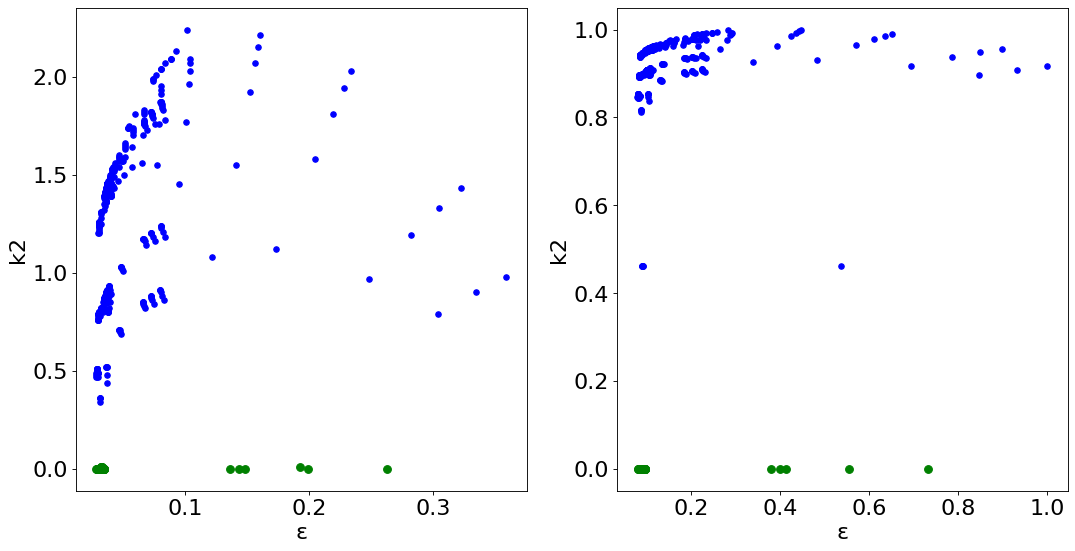

In [4]:
AL.results_visualization()

<font color=black size=7 face="Times New Roman"> One Hidden Layer in forward</font>

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 12.57988


,0,1
0,0.135984,0.491631
1,0.134650,0.382731
2,0.135951,0.488933
3,0.135011,0.412217
4,0.134836,0.397893
...,...,...
191,0.137848,0.643824
192,0.140838,0.887950
193,0.137083,0.581411
194,0.141225,0.919542


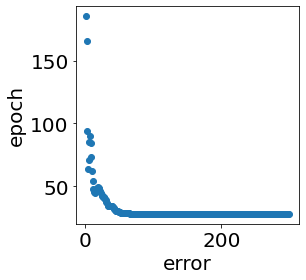

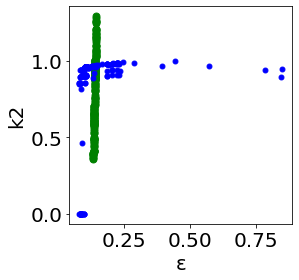

In [14]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer = 10
learning_rate = 0.1

AL.ANN_L1_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer, learning_rate)

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 10.5356245


,0,1
0,0.126303,0.421354
1,0.088376,0.416343
2,0.092348,0.479498
3,0.091302,0.462871
4,0.087718,0.405880
...,...,...
191,0.109093,0.745732
192,0.099062,0.586241
193,0.123047,0.967584
194,0.136807,0.965945


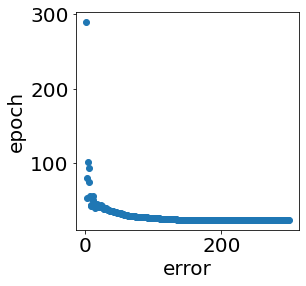

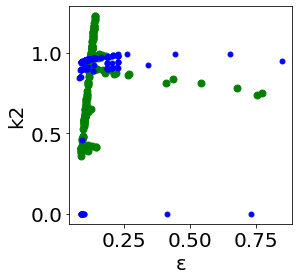

In [15]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer = 20
learning_rate = 0.1

AL.ANN_L1_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer, learning_rate)

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=30, bias=True)
  (predict_layer): Linear(in_features=30, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 7.819215


,0,1
0,0.083155,0.316700
1,0.081114,0.285215
2,0.081822,0.296147
3,0.081976,0.294234
4,0.098884,0.436911
...,...,...
191,0.128661,1.018681
192,0.127087,0.994404
193,0.100459,0.583633
194,0.135356,0.862453


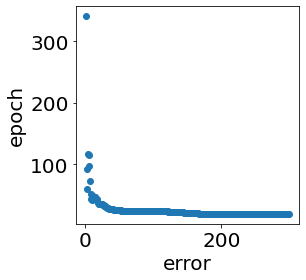

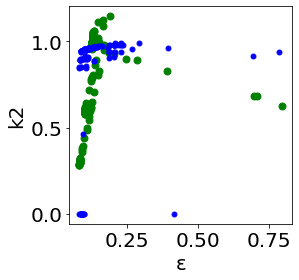

In [16]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer = 30
learning_rate = 0.1

AL.ANN_L1_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer, learning_rate)

In [8]:
'''net = ANN_L1(n_feature = dim_input, n_hidden = n_hidden_layer, n_output = dim_output)#initialization of ANN
print(net)

# train net with optimization method chose
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# error computation method
loss_func = torch.nn.MSELoss()
# divide dataset into train set and test set
train_macro, test_macro = train_test_split(df_processed_macro, train_size = 0.7)
train_micro, test_micro = train_test_split(df_processed_micro, train_size = 0.7)
train = pd.concat( [train_macro, train_micro], axis=0)
test = pd.concat( [test_macro, test_micro], axis=0)
train_input_tensor = torch.tensor(train.iloc[:,0:6].values)
train_output_tensor = torch.tensor(train.iloc[:,6:].values)
test_input_tensor = torch.tensor(test.iloc[:,0:6].values)
test_output_tensor = torch.tensor(test.iloc[:,6:].values)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_ylabel('epoch', fontsize=20)
ax1.set_xlabel('error', fontsize=20)
plt.tick_params(labelsize=20)


def frame_maker(train):
    global error
    error = pd.DataFrame(columns=['epoch','error'])
    # start training and :ilustrate the 
    for i in range(n_train):
        # input data to predict
        prediction = net(train_input_tensor.float())
    
        # error between expected data and predicted data, pay attention on consequence
        # first is predicted, second is real value
        loss = loss_func(prediction, train_output_tensor.float())

        # start optimize
        # set gradient as 0 before each optimization
        optimizer.zero_grad()
    
        # error pachpropogation
        loss.backward()
    
        # optimize parameters based on minimum loss
        optimizer.step()
    
        #print(i)
        #print(loss.data.numpy())
        # plot the error in every epoch
        #ax1.scatter(i, loss.data.numpy(), s = 24, c = 'b')
        error = error.append(pd.DataFrame({'epoch':[i],'error':[loss.data.numpy()]}))
        ax1.scatter(error['epoch'], error['error'])
        #ax1.plot(i, loss.data.numpy(), c='r')
        #plt.pause(0.1)

ani = animation.FuncAnimation(fig1, frame_maker, frames=list(range(299)))
html = ani.to_html5_video()
plt.close(fig1)
HTML(html)'''

"net = ANN_L1(n_feature = dim_input, n_hidden = n_hidden_layer, n_output = dim_output)#initialization of ANN\nprint(net)\n\n# train net with optimization method chose\noptimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)\n# error computation method\nloss_func = torch.nn.MSELoss()\n# divide dataset into train set and test set\ntrain_macro, test_macro = train_test_split(df_processed_macro, train_size = 0.7)\ntrain_micro, test_micro = train_test_split(df_processed_micro, train_size = 0.7)\ntrain = pd.concat( [train_macro, train_micro], axis=0)\ntest = pd.concat( [test_macro, test_micro], axis=0)\ntrain_input_tensor = torch.tensor(train.iloc[:,0:6].values)\ntrain_output_tensor = torch.tensor(train.iloc[:,6:].values)\ntest_input_tensor = torch.tensor(test.iloc[:,0:6].values)\ntest_output_tensor = torch.tensor(test.iloc[:,6:].values)\n\nfig1, ax1 = plt.subplots(figsize=(8,8))\nax1.set_ylabel('epoch', fontsize=20)\nax1.set_xlabel('error', fontsize=20)\nplt.tick_params(labelsize=20

<font color=black size=7 face="Times New Roman"> Two Hidden Layer in forward </font>

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 3.2312644


,0,1
0,0.061375,0.574907
1,0.091190,0.015951
2,0.091190,0.015951
3,0.091190,0.015951
4,0.091190,0.015951
...,...,...
191,0.082624,0.960106
192,0.112978,0.948517
193,0.224904,0.905784
194,0.105148,0.951507


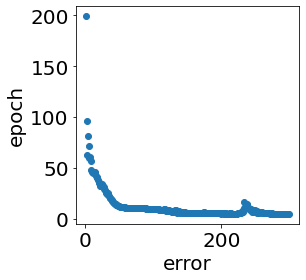

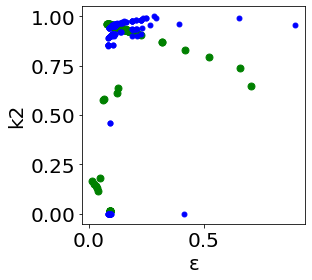

In [37]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 10
n_hidden_layer2 = 10
learning_rate = 0.1

AL.ANN_L2_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, learning_rate)

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=20, bias=True)
  (hidden_layer2): Linear(in_features=20, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 23.40198


,0,1
0,0.138902,0.807924
1,0.138902,0.807924
2,0.138902,0.807924
3,0.138902,0.807924
4,0.138902,0.807924
...,...,...
191,0.138902,0.807924
192,0.138902,0.807924
193,0.138902,0.807924
194,0.138902,0.807924


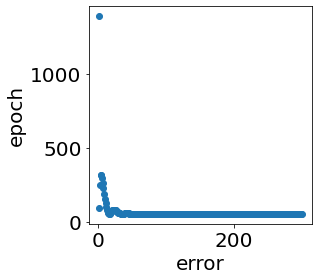

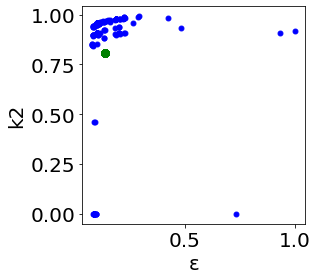

In [10]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 20
n_hidden_layer2 = 20
learning_rate = 0.1

AL.ANN_L2_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, learning_rate)

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=30, bias=True)
  (hidden_layer2): Linear(in_features=30, out_features=30, bias=True)
  (predict_layer): Linear(in_features=30, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 23.681639


,0,1
0,0.136502,0.806548
1,0.136502,0.806548
2,0.136502,0.806548
3,0.136502,0.806548
4,0.136502,0.806548
...,...,...
191,0.136502,0.806548
192,0.136502,0.806548
193,0.136502,0.806548
194,0.136502,0.806548


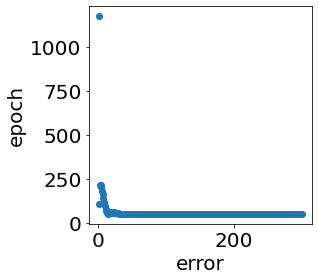

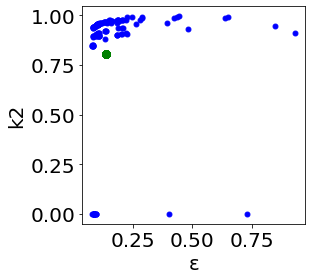

In [11]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 30
n_hidden_layer2 = 30
learning_rate = 0.1

AL.ANN_L2_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, learning_rate)

<font color=black size=7 face="Times New Roman"> Three Hidden Layer in forward </font>

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (hidden_layer3): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 12.598022


,0,1
0,0.119469,0.480969
1,0.116796,0.441587
2,0.110008,0.341567
3,0.113490,0.392873
4,0.111491,0.363424
...,...,...
191,0.147690,0.896795
192,0.123308,0.537539
193,0.143958,0.841811
194,0.150239,0.934349


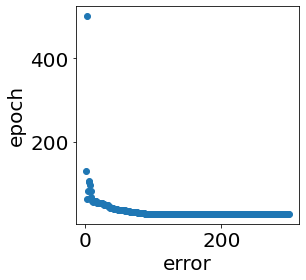

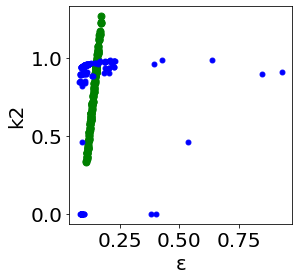

In [17]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 10
n_hidden_layer2 = 10
n_hidden_layer3 = 10
learning_rate = 0.1

AL.ANN_L3_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, n_hidden_layer3,learning_rate)

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=20, bias=True)
  (hidden_layer2): Linear(in_features=20, out_features=20, bias=True)
  (hidden_layer3): Linear(in_features=20, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 22.113783


,0,1
0,0.141105,0.807187
1,0.141105,0.807187
2,0.141105,0.807187
3,0.141105,0.807187
4,0.141105,0.807187
...,...,...
191,0.141105,0.807187
192,0.141105,0.807187
193,0.141105,0.807187
194,0.141105,0.807187


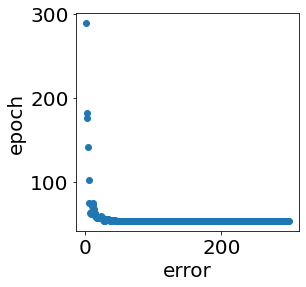

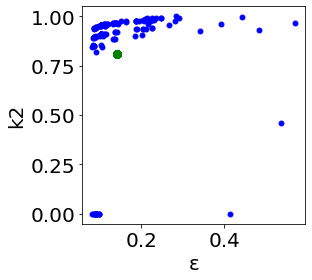

In [13]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 20
n_hidden_layer2 = 20
n_hidden_layer3 = 20
learning_rate = 0.1

df_result =  AL.ANN_L3_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, n_hidden_layer3,learning_rate)

AL.ANN_L3_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, n_hidden_layer3,learning_rate)

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=30, bias=True)
  (hidden_layer2): Linear(in_features=30, out_features=30, bias=True)
  (hidden_layer3): Linear(in_features=30, out_features=30, bias=True)
  (predict_layer): Linear(in_features=30, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 22.675806


,0,1
0,0.140156,0.805608
1,0.140156,0.805608
2,0.140156,0.805608
3,0.140156,0.805608
4,0.140156,0.805608
...,...,...
191,0.140156,0.805608
192,0.140156,0.805608
193,0.140156,0.805608
194,0.140156,0.805608


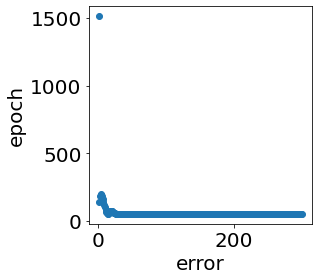

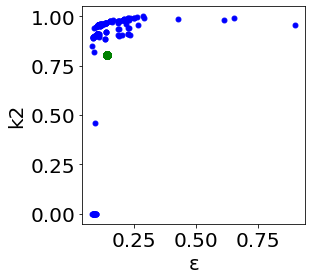

In [18]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 30
n_hidden_layer2 = 30
n_hidden_layer3 = 30
learning_rate = 0.1

AL.ANN_L3_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, n_hidden_layer3,learning_rate)

ANN_L3(
  (hidden_layer1): Linear(in_features=6, out_features=40, bias=True)
  (hidden_layer2): Linear(in_features=40, out_features=40, bias=True)
  (hidden_layer3): Linear(in_features=40, out_features=40, bias=True)
  (predict_layer): Linear(in_features=40, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 28.207476


,0,1
0,0.167595,0.633835
1,0.167595,0.633835
2,0.167595,0.633835
3,0.167595,0.633835
4,0.167595,0.633835
...,...,...
191,0.167595,0.633835
192,0.167595,0.633835
193,0.167595,0.633835
194,0.167595,0.633835


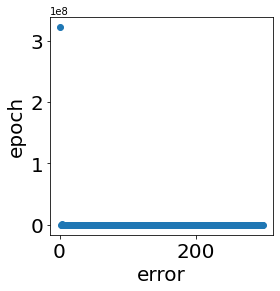

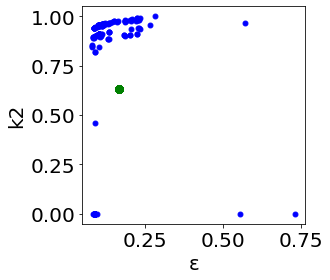

In [32]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer1 = 40
n_hidden_layer2 = 40
n_hidden_layer3 = 40
learning_rate = 0.5

AL.ANN_L3_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, n_hidden_layer3,learning_rate)

In [ ]:
# train net with optimization method chose
df_origin_macro = df_origin[df_origin['wavenumber'] <= 2e-2]
df_origin_micro = df_origin[df_origin['wavenumber'] > 2e-2]
df_processed_macro = df_processed[df_processed['wavenumber'] == 0]
df_processed_micro = df_processed[df_processed['wavenumber'] != 0]
df_train_macro, df_test_macro = train_test_split(df_processed_macro, train_size = 0.7)
df_train_micro, df_test_micro = train_test_split(df_processed_micro, train_size = 0.7)
df_test = pd.concat( [df_test_macro, df_test_micro], axis=0)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# error computation method
loss_func = torch.nn.MSELoss()
# divide dataset into train set and test set
train_macro, test_macro = train_test_split(df_processed_macro, train_size = 0.7)
train_micro, test_micro = train_test_split(df_processed_micro, train_size = 0.7)
train = pd.concat( [train_macro, train_micro], axis=0)
test = pd.concat( [test_macro, test_micro], axis=0)
train_input_tensor = torch.tensor(train.iloc[:,0:6].values)
train_output_tensor = torch.tensor(train.iloc[:,6:].values)
test_input_tensor = torch.tensor(test.iloc[:,0:6].values)
test_output_tensor = torch.tensor(test.iloc[:,6:].values)

#fig, ax = plt.subplots()
fig1, ax1 = plt.subplots(figsize=(8,8))
fig2, ax2 = plt.subplots(figsize=(8,8))
ax1.set_xlabel('epoch', fontsize=20)
ax1.set_ylabel('error', fontsize=20)
plt.ylim(0,1)
plt.tick_params(labelsize=20)
ax2.set_ylabel('k2', fontsize=20)
ax2.set_xlabel('ε', fontsize=20)
plt.tick_params(labelsize=20)


def frame_maker(train):
    global error
    error = pd.DataFrame(columns=['epoch','error'])
    # start training and :ilustrate the 
    for i in range(n_train):
        #df_prediction_point = AL.ANN_L2_train_test_forward(n_train, dim_input, dim_output, n_hidden_layer1, n_hidden_layer2, learning_rate)
        #net = AL.ANN_L2(n_feature = dim_input, n_hidden1 = n_hidden_layer1, n_hidden2 = n_hidden_layer2, n_output = dim_output)
        # input data to predict
        prediction = net(train_input_tensor.float())
    
        # error between expected data and predicted data, pay attention on consequence
        # first is predicted, second is real value
        loss = loss_func(prediction, train_output_tensor.float())

        # start optimize
        # set gradient as 0 before each optimization
        optimizer.zero_grad()
    
        # error pachpropogation
        loss.backward()
    
        # optimize parameters based on minimum loss
        optimizer.step()
        error = error.append(pd.DataFrame({'epoch':[i],'error':[loss.data.numpy()]}))
        
        if (i//10 == 0 or i//10 == 5) and i >= 10:
            
            #print(i)
            #print(loss.data.numpy())
            # plot the error in every epoch
            #ax1.scatter(i, loss.data.numpy(), s = 24, c = 'b')
            #ax1.scatter(error['error'], error['epoch'])
            #http://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html
            x = np.array(error['epoch'],dtype='float')
            y = np.array(error['error'],dtype='float')
            p = np.poly1d(np.polyfit(x, y, 15))
            t = np.linspace(0, 55, 50)
            ax1.plot(x, y, 'o',t, p(t), '-')
            #ax1.set_yscale('log')
            ax1.set_ylim(0.001,1)
            #ax1.plot(i, loss.data.numpy(), c='r')
            #plt.pause(0.1)
            ax2.scatter(df_prediction_point.iloc[:,0], df_prediction_point.iloc[:,1], s = 48, c = 'g')
            #ax2.scatter(df_test.iloc[:,6], df_test.iloc[:,7], s = 24, c = 'b')


ani = animation.FuncAnimation(fig1, frame_maker, frames=list(range(10)))
ani2  = animation.FuncAnimation(fig2, frame_maker, frames=list(range(10)))
html = ani.to_html5_video()
html2 = ani2.to_html5_video()
plt.close(fig1)
plt.close(fig2)
HTML(html2)

ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 2.3671303
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 2.4349332
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 19.085089
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_laye

/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.9498408
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 4.3769727
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 2.2605042
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 11.410548
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 23.322117
ANN_L2

/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 4.8088665
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 3.3872108
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 9.861064
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 6.8583527
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.6166575
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.732881
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 5.4425483
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.456048
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.568712
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 24.412672
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 9.525772
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 4.0867715
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 11.571711
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 13.024955
ANN_L2(

/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 23.08204
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 8.635153
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 3.9792593
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.9677613
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 16.886944
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 8.856408
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 10.520908
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 11.711386
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.673708
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 5.0011725
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.7464695
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 12.618249
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 3.3066058
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 10.339993
ANN_L

/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.97934
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.290479
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 10.727325
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 23.64037
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 10.132063
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 3.7520952
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 4.599074
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 11.083805
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.673746
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.5634515
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 22.902842
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 3.302032
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 13.236632
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 11.549402
ANN_L2(

/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.312693
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 10.564932
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 22.319035
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.4738362
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 5.332642
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 3.5167763
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 13.890404
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.0711546
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 2.7232018
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 8.985276
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 6.5168653
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 4.548887
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 5.6527767
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 9.086027
ANN_L2(


/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 12.09731
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 22.782896
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 10.63283
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 13.363728
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 1.854217
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 4.8385386
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 7.6944337
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 4.0559354
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 22.24497
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))
/home/sye22/final/ANNlinear.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 10.658714
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)


/home/sye22/final/ANNlinear.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(4,4))


The main square error of trained net in test set (expected and predicted): 4.23273
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 11.841638
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 23.312368
ANN_L2(
  (hidden_layer1): Linear(in_features=6, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict_layer): Linear(in_features=10, out_features=2, bias=True)
)
The main square error of trained net in test set (expected and predicted): 14.766333
ANN_L2(
